In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv
/kaggle/input/fivethirtyeight-comic-characters-dataset/README.md
/kaggle/input/fivethirtyeight-comic-characters-dataset/dc-wikia-data.csv


In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

marvel_data=pd.read_csv('../input/fivethirtyeight-comic-characters-dataset/marvel-wikia-data.csv')

marvel_data.columns=marvel_data.columns.str.title()



In [3]:
marvel_data.head()

,Page_Id,Name,Urlslug,Id,Align,Eye,Hair,Sex,Gsm,Alive,Appearances,First Appearance,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


<AxesSubplot:xlabel='Alive'>

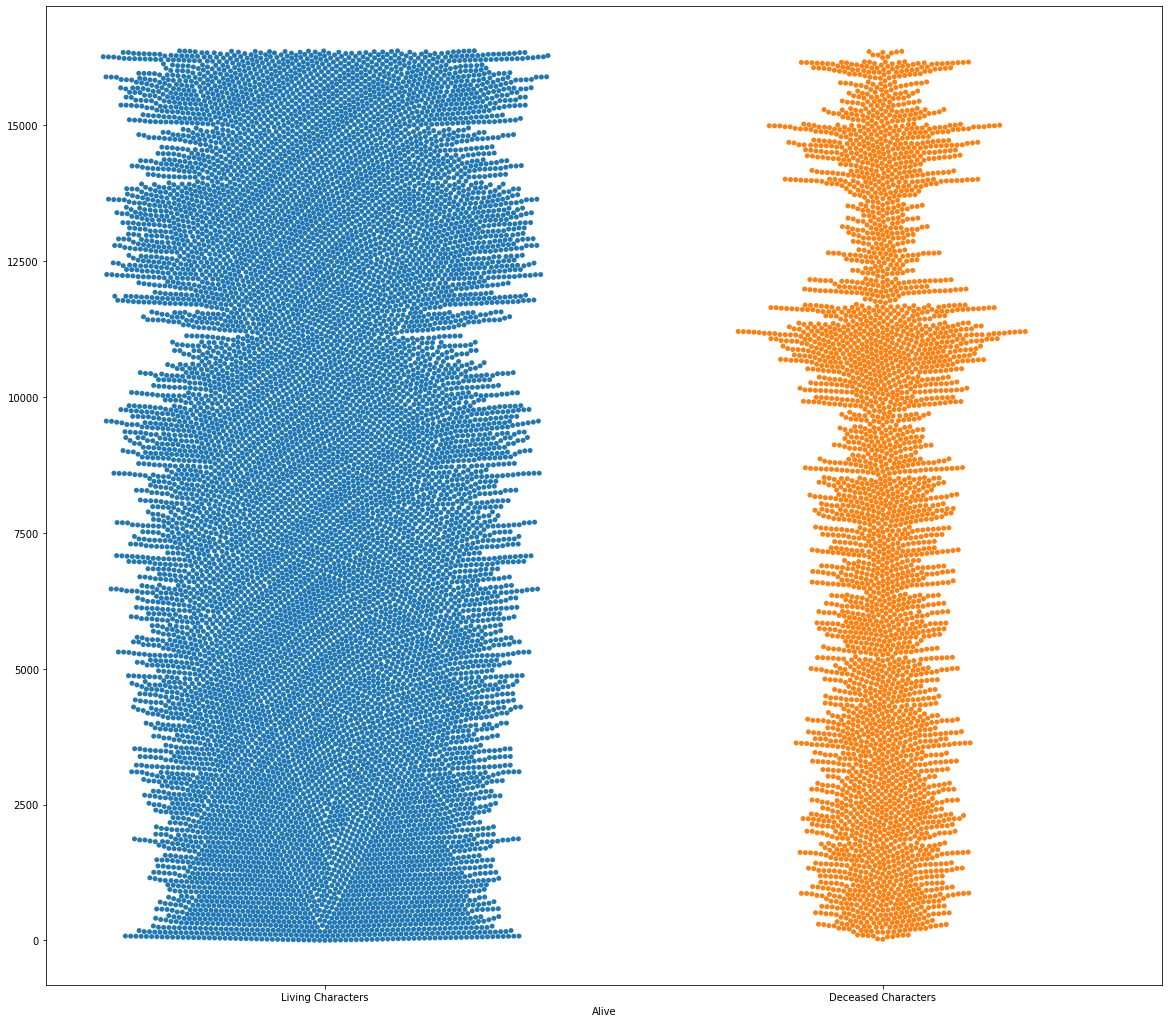

In [4]:
plt.figure(figsize=(20,18))
sns.swarmplot(x=marvel_data['Alive'],y=marvel_data.index)

In [5]:
def living_or_not(item):
  if item=='Living Characters':
    return 1
  return 0

marvel_data['Alive']=marvel_data['Alive'].apply(living_or_not)

percentage_of_charecters_alive=(marvel_data[marvel_data['Alive']==1].shape[0]/marvel_data.shape[0])*100
percentage_of_charecters_alive

76.99071812408403

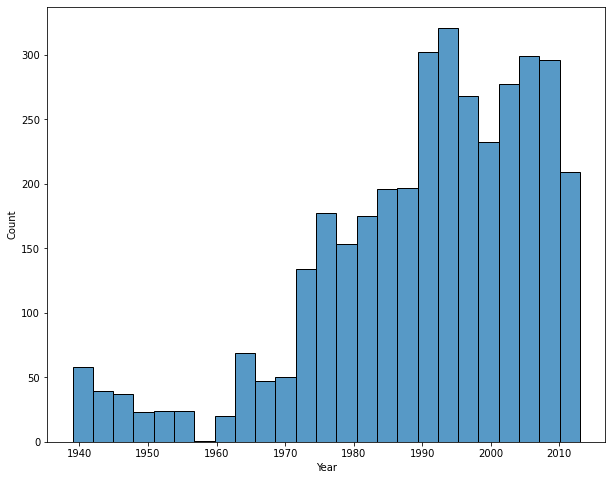

In [6]:

marvel_data['First Appearance'].dropna(inplace=True)

female=marvel_data[marvel_data['Sex']=='Female Characters']

female.reset_index(inplace=True)
plt.figure(figsize=(10,8))
sns.histplot(data=female['Year'])
sns.set_style('white')
female.set_index('Name',inplace=True)

<AxesSubplot:title={'center':'New Female Characters Introduced'}, xlabel='Year', ylabel='Num of characters'>

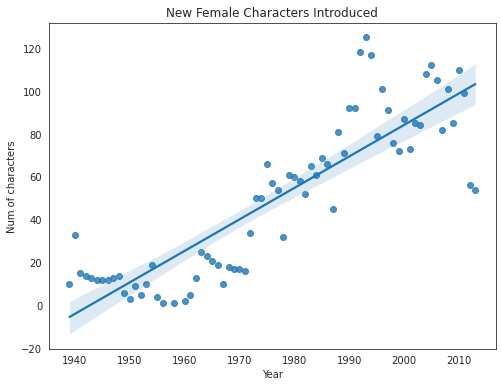

In [7]:
female.reset_index(inplace=True)
plt.figure(figsize=(8,6))

num_female=female.groupby('Year').agg({'Year':len})
num_female.rename(columns={'Year':'Num of characters'},inplace=True)
plt.title('New Female Characters Introduced')
sns.regplot(x=num_female.index,y=num_female['Num of characters'])

<AxesSubplot:title={'center':'Hair Color count for females having at least 50 people with same hair'}, xlabel='Hair', ylabel='Count'>

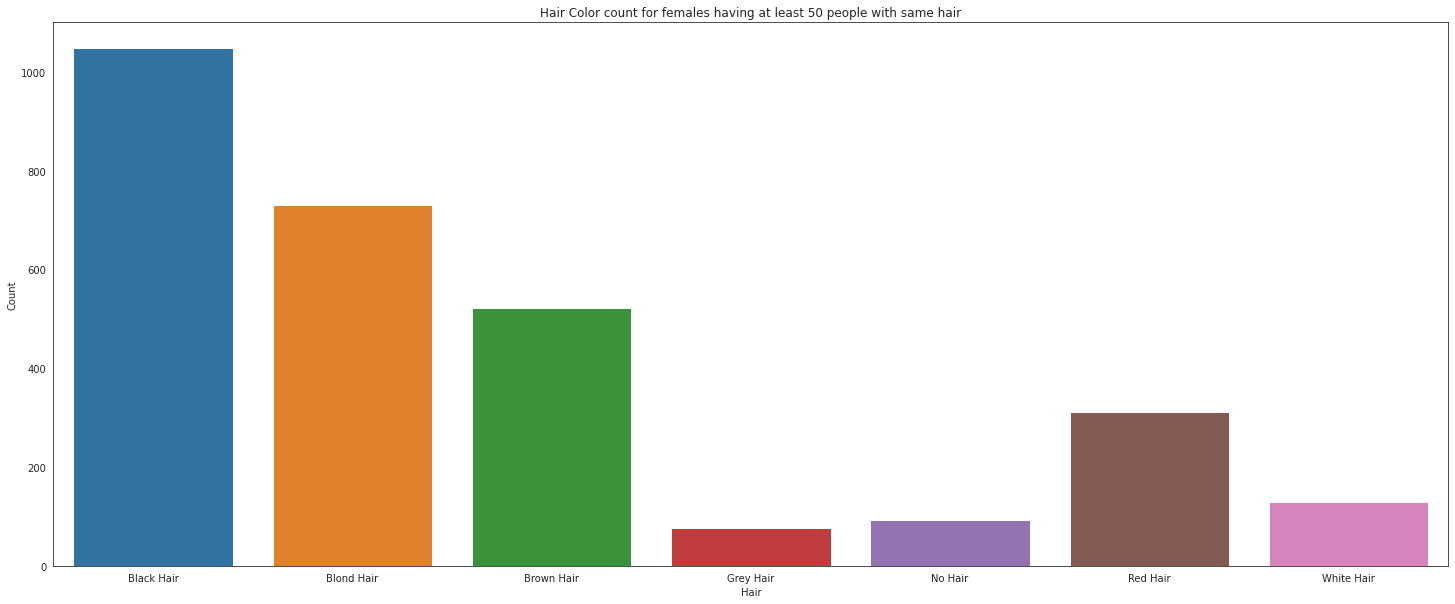

In [8]:
plt.figure(figsize=(25,10))
hair_color=female.groupby('Hair').agg({'Hair':len})
hair_color.rename(columns={'Hair':'Count'},inplace=True)
hair_color=hair_color[hair_color['Count']>50]
plt.title('Hair Color count for females having at least 50 people with same hair')
sns.barplot(x=hair_color.index,y=hair_color['Count'])


<AxesSubplot:xlabel='Year', ylabel='Count'>

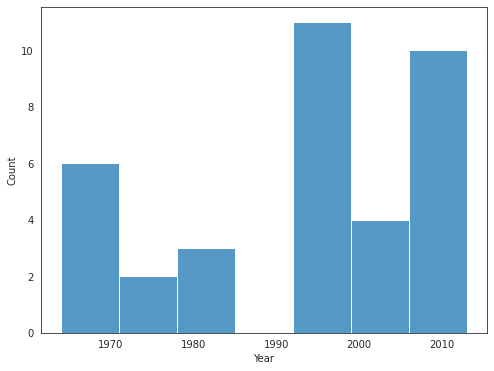

In [9]:
ag=marvel_data[marvel_data['Sex']=='Agender Characters']

ag.reset_index(inplace=True)
plt.figure(figsize=(8,6))
sns.histplot(data=ag['Year'])

<AxesSubplot:xlabel='Year', ylabel='Num of characters'>

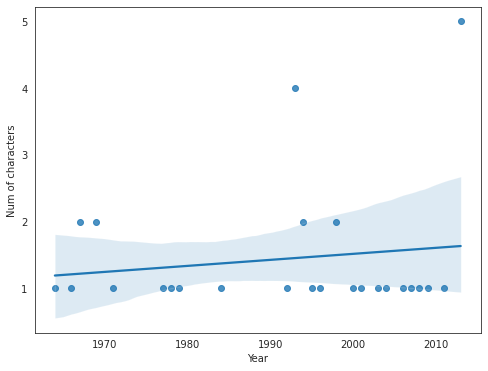

In [10]:
agen=marvel_data[marvel_data['Sex']=='Agender Characters']

agen.reset_index(inplace=True)
plt.figure(figsize=(8,6))
num_agen=agen.groupby('Year').agg({'Year':len})
num_agen.rename(columns={'Year':'Num of characters'},inplace=True)

sns.regplot(x=num_agen.index,y=num_agen['Num of characters'])

<AxesSubplot:title={'center':'New male Characters Introduced'}, xlabel='Year', ylabel='Num of characters'>

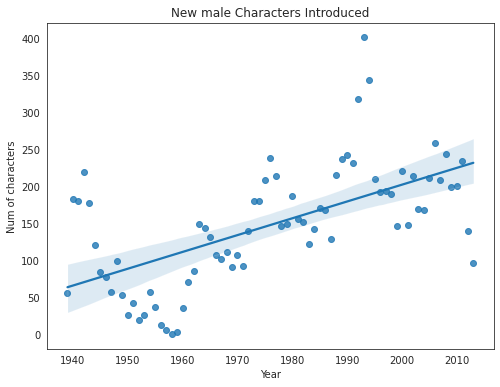

In [11]:
male=marvel_data[marvel_data['Sex']=='Male Characters']

male.reset_index(inplace=True)
num_male=male.groupby('Year').agg({'Year':len})
num_male.rename(columns={'Year':'Num of characters'},inplace=True)
plt.figure(figsize=(8,6))
plt.title('New male Characters Introduced')
sns.regplot(x=num_male.index,y=num_male['Num of characters'])

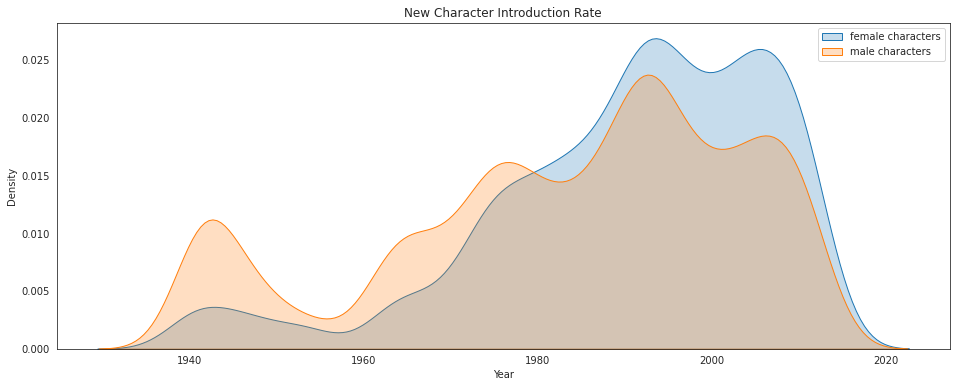

In [12]:
plt.figure(figsize=(16,6))
sns.kdeplot(data=female['Year'],label='female characters',shade=True)
sns.kdeplot(data=male['Year'],label='male characters',shade=True)
plt.title('New Character Introduction Rate')
plt.legend()

In [13]:

marvel_data=marvel_data[marvel_data['Year']<=2013]
marvel_data['First Appearance']=marvel_data['First Appearance'].str.extract('(\w+)')

def datechange(item):
  z=round(item['Year'])
  return item['First Appearance'] + ',' +str(z)
marvel_data['Appearance']=pd.to_datetime(marvel_data.apply(datechange,axis=1))

marvel_data.set_index('Name',inplace=True)

gen_grp=marvel_data.groupby('Sex').agg({'Year':[np.min,np.max,len]})
gen_grp.columns=['First','Last','Count']
gen_grp.reset_index(inplace=True)

def first_ones(item):
  c=marvel_data[marvel_data['Sex']==item]
  return c['Appearance'].idxmin()

gen_grp['First ones']=gen_grp['Sex'].apply(first_ones)
gen_grp

,Sex,First,Last,Count,First ones
0,Agender Characters,1964.0,2013.0,36,Living Brain (Earth-616)
1,Female Characters,1939.0,2013.0,3628,Dorma (Earth-616)
2,Genderfluid Characters,1949.0,2005.0,2,Loki Laufeyson (Earth-616)
3,Male Characters,1939.0,2013.0,11100,Human Torch (Android) (Earth-616)


<AxesSubplot:xlabel='Id', ylabel='count'>

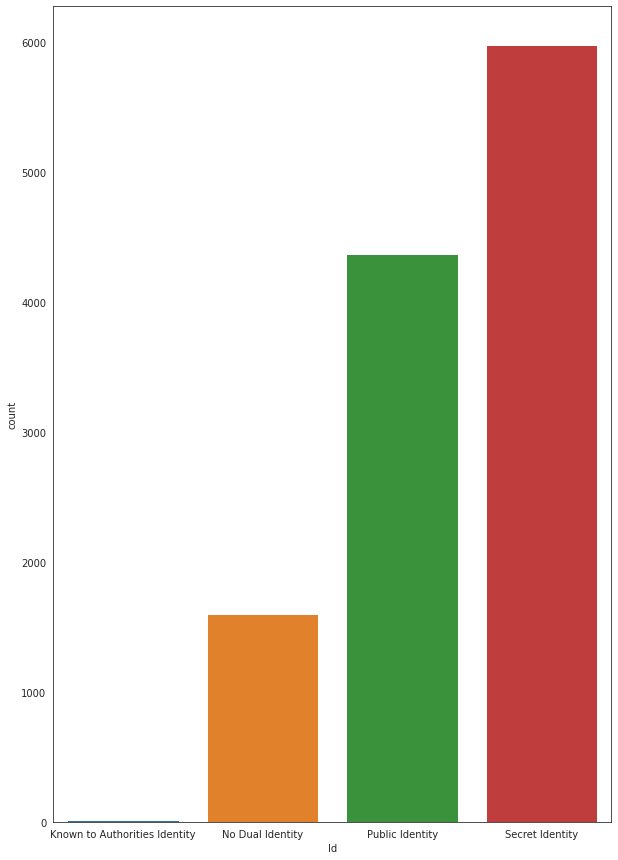

In [14]:
z=marvel_data.groupby('Id').agg({'Id':len})
z.columns=['count']
plt.figure(figsize=(10,15))
sns.barplot(y=z['count'],x=z.index)